In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
ahu_data_1 = pd.read_csv("canal ahu 1.csv")
t = pd.to_datetime(ahu_data_1.iloc[:, 0], format="ISO8601")
sFan = ahu_data_1.iloc[:, 19]  # Fan status (%)

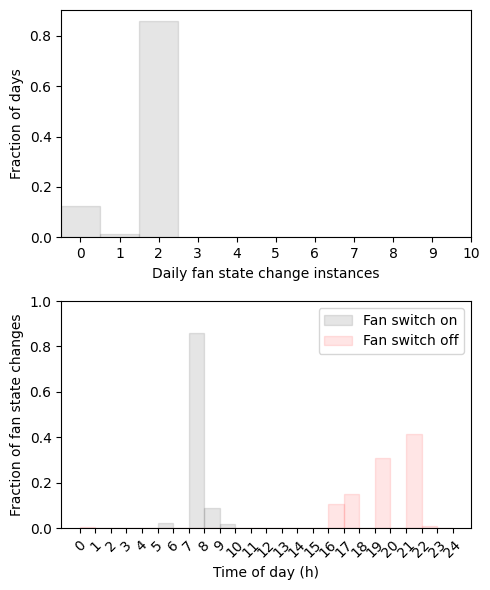

In [8]:
import pandas as pd

# Assuming `t` and `sFan` are already loaded from previous code
timeOfDay = t.dt.hour
dayOfWeek = t.dt.weekday

# Prepare variables for storing state change data
numStateChange = []
timeOfSwitchOn = []
timeOfSwitchOff = []

# Calculate daily fan state changes and record switch on/off times
for i in range(
    int(t.min().floor("D").timestamp()), int(t.max().ceil("D").timestamp()), 86400
):  # 86400 sec = 1 day
    day_mask = (t >= pd.to_datetime(i, unit="s")) & (
        t < pd.to_datetime(i + 86400, unit="s")
    )
    fan_day = sFan[day_mask].values

    # Calculate number of fan state changes for the day
    numStateChange.append(np.sum(np.abs(np.diff(fan_day)) > 0.5))

    # Record times of switch on and off events
    time_diff = np.diff(fan_day)
    switch_on_times = timeOfDay[day_mask].iloc[:-1][time_diff > 0.5]
    switch_off_times = timeOfDay[day_mask].iloc[:-1][time_diff < -0.5]
    timeOfSwitchOn.extend(switch_on_times)
    timeOfSwitchOff.extend(switch_off_times)

# Convert lists to arrays for histogram plotting
timeOfSwitchOn = np.array(timeOfSwitchOn)
timeOfSwitchOff = np.array(timeOfSwitchOff)

# Plotting mode of operation
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Histogram for daily fan state changes
edges = np.arange(-0.5, 11.5, 1)
axes[0].hist(
    numStateChange, bins=edges, density=True, color="black", alpha=0.1, edgecolor="k"
)
axes[0].set_xticks(range(11))
axes[0].set_xlim([-0.49, 10])
axes[0].set_xlabel("Daily fan state change instances")
axes[0].set_ylabel("Fraction of days")
axes[0].tick_params(direction="out")
axes[0].grid(False)

# Histogram for fan switch on/off times
edges = np.arange(0, 25, 1)
axes[1].hist(
    timeOfSwitchOn,
    bins=edges,
    density=True,
    color="black",
    alpha=0.1,
    edgecolor="k",
    label="Fan switch on",
)
axes[1].hist(
    timeOfSwitchOff,
    bins=edges,
    density=True,
    color="red",
    alpha=0.1,
    edgecolor="r",
    label="Fan switch off",
)
axes[1].set_xticks(range(25))
axes[1].set_ylim([0, 1])
axes[1].set_xlabel("Time of day (h)")
axes[1].set_ylabel("Fraction of fan state changes")
axes[1].legend(loc="upper right")
axes[1].tick_params(axis="x", direction="out", rotation=45)
axes[1].grid(False)

plt.tight_layout()
plt.savefig("Fan_State_Changes_Ahu_1.png", dpi=600)
plt.show()


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
ahu_data_2 = pd.read_csv("canal ahu 2.csv")
t = pd.to_datetime(ahu_data_2.iloc[:, 0], format="ISO8601")
sFan = ahu_data_2.iloc[:, 19]  # Fan status (%)

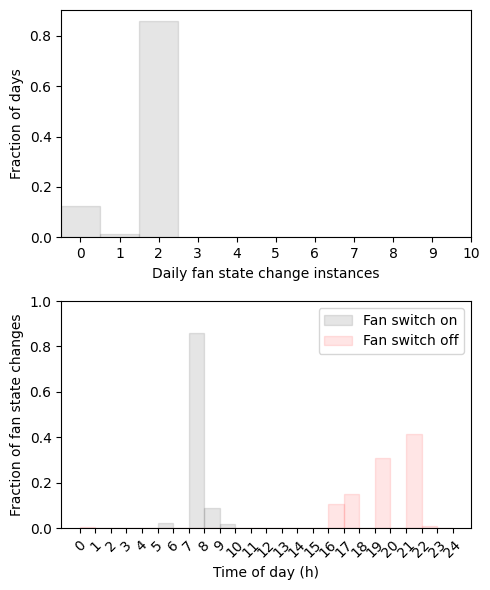

In [10]:
import pandas as pd

# Assuming `t` and `sFan` are already loaded from previous code
timeOfDay = t.dt.hour
dayOfWeek = t.dt.weekday

# Prepare variables for storing state change data
numStateChange = []
timeOfSwitchOn = []
timeOfSwitchOff = []

# Calculate daily fan state changes and record switch on/off times
for i in range(
    int(t.min().floor("D").timestamp()), int(t.max().ceil("D").timestamp()), 86400
):  # 86400 sec = 1 day
    day_mask = (t >= pd.to_datetime(i, unit="s")) & (
        t < pd.to_datetime(i + 86400, unit="s")
    )
    fan_day = sFan[day_mask].values

    # Calculate number of fan state changes for the day
    numStateChange.append(np.sum(np.abs(np.diff(fan_day)) > 0.5))

    # Record times of switch on and off events
    time_diff = np.diff(fan_day)
    switch_on_times = timeOfDay[day_mask].iloc[:-1][time_diff > 0.5]
    switch_off_times = timeOfDay[day_mask].iloc[:-1][time_diff < -0.5]
    timeOfSwitchOn.extend(switch_on_times)
    timeOfSwitchOff.extend(switch_off_times)

# Convert lists to arrays for histogram plotting
timeOfSwitchOn = np.array(timeOfSwitchOn)
timeOfSwitchOff = np.array(timeOfSwitchOff)

# Plotting mode of operation
fig, axes = plt.subplots(2, 1, figsize=(5, 6))

# Histogram for daily fan state changes
edges = np.arange(-0.5, 11.5, 1)
axes[0].hist(
    numStateChange, bins=edges, density=True, color="black", alpha=0.1, edgecolor="k"
)
axes[0].set_xticks(range(11))
axes[0].set_xlim([-0.49, 10])
axes[0].set_xlabel("Daily fan state change instances")
axes[0].set_ylabel("Fraction of days")
axes[0].tick_params(direction="out")
axes[0].grid(False)

# Histogram for fan switch on/off times
edges = np.arange(0, 25, 1)
axes[1].hist(
    timeOfSwitchOn,
    bins=edges,
    density=True,
    color="black",
    alpha=0.1,
    edgecolor="k",
    label="Fan switch on",
)
axes[1].hist(
    timeOfSwitchOff,
    bins=edges,
    density=True,
    color="red",
    alpha=0.1,
    edgecolor="r",
    label="Fan switch off",
)
axes[1].set_xticks(range(25))
axes[1].set_ylim([0, 1])
axes[1].set_xlabel("Time of day (h)")
axes[1].set_ylabel("Fraction of fan state changes")
axes[1].legend(loc="upper right")
axes[1].tick_params(axis="x", direction="out", rotation=45)
axes[1].grid(False)

plt.tight_layout()
plt.savefig("Fan_State_Changes_Ahu_2.png", dpi=600)
plt.show()
